In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

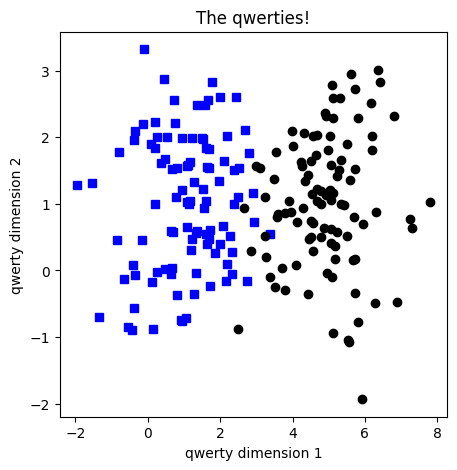

In [21]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [22]:
def createANNmodel(LearningRates):

    ANNclassify = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.ReLU(),
    nn.Linear(1, 1),
    nn.Sigmoid()
    )

    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=LearningRates)

    return ANNclassify, lossfun, optimizer
    

In [23]:
numepochs = 1000

def trainTheModel(ANNmodel):
    losses = torch.zeros(numepochs)
    
    for epochi in range(numepochs):

        yHat = ANNmodel(data)

        loss = lossfun(yHat, labels)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    predictions = ANNmodel(data)
    totalacc = 100*torch.mean(((predictions>0.5) == labels).float())

    return losses,predictions,totalacc
        

Final accuracy: 96%


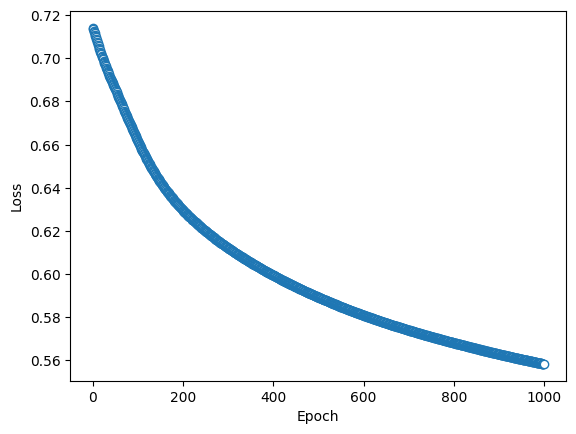

In [24]:
ANNclassify,lossfun,optimizer = createANNmodel(.05)

losses,predictions,totalacc = trainTheModel(ANNclassify)

print('Final accuracy: %g%%' %totalacc)


plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

In [25]:
learningrates = np.linspace(0.01, 0.1, 40)

accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

for i,lr in enumerate(learningrates):
  
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()


/tmp/ipython-input-2353728489.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


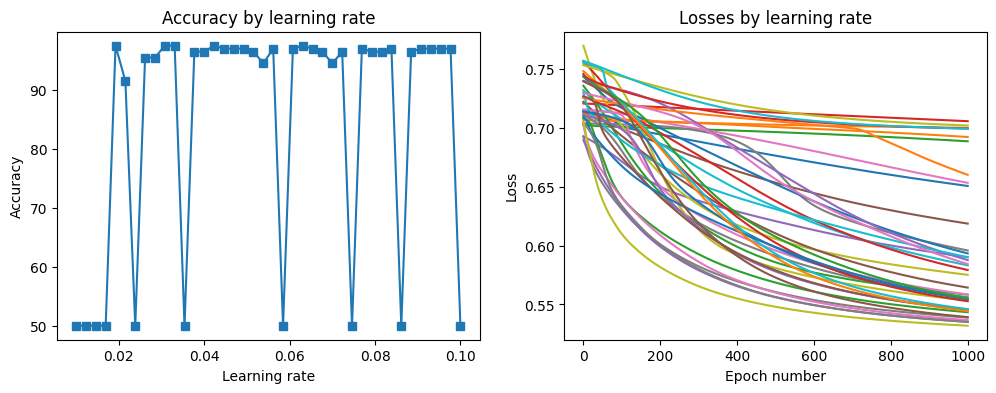

In [26]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [27]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.7500)